In [30]:
import random
import numpy as np
import matplotlib.pylab as plt
import matplotlib.lines as mlines

In [140]:
random.seed(12345)
np.random.seed(12345)

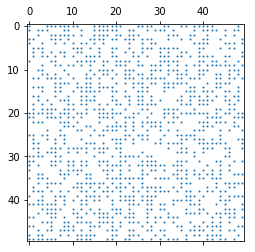

In [30]:
# sample ER graph & look at it
np.random.seed(12345)
n=50
p=0.5
ER=np.random.random((n,n))>1-p
ER=ER*1
plt.spy(ER, marker='o', markersize=1)
plt.show()

100027


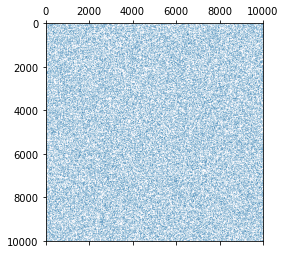

In [205]:
## sample large ER graph & look at it
np.random.seed(12345)
n=10**4
p=10**-3
m=np.random.binomial(n**2, p)
pi=np.random.choice(np.random.permutation(n**2), replace=False, size=m)
print m
A=np.zeros((n,n))
A=A.flatten()
# print A.shape
A[pi] = 1
A=A.reshape((n,n))
plt.spy(A, marker='o',markersize=0.05)
plt.show()

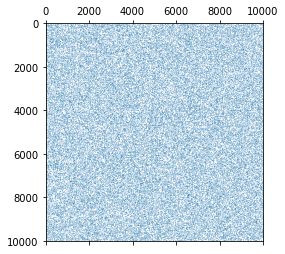

In [207]:
## plot same graph but randomly resorted
np.random.seed(12345)
pi=np.random.permutation(n)
plt.spy(A[np.ix_(pi,pi)], marker='o', markersize=0.05)
plt.show()

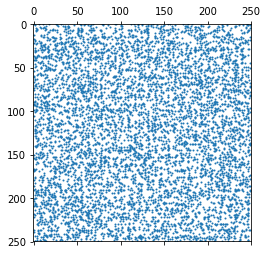

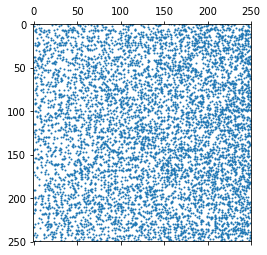

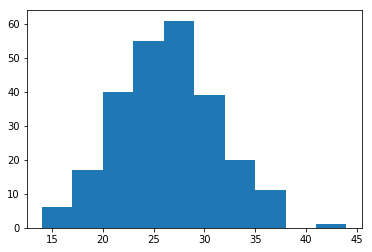

In [202]:
## sort by degree
np.random.seed(12345)
n=250
p=0.1
A=np.random.random((n,n))>1-p
A=A*1
plt.spy(A, marker='o', markersize=1)
plt.show()
deg=np.sum(A, axis=0)
I=np.argsort(deg)
B=deg[I]
plt.spy(A[np.ix_(I,I)], marker='o', markersize=1)
plt.show()
plt.hist(deg)
plt.show()

0.103264


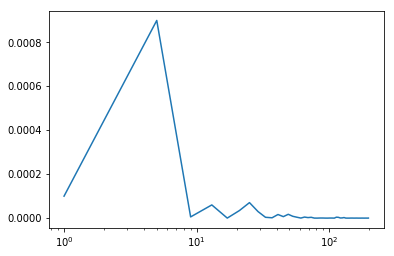

In [211]:
## estimate p
np.random.seed(12345)
n=250
p=0.1
A=np.random.random((n,n))>1-p
A=A*1

phat=np.sum(A)/n**2.
print phat

## compute error vs n
p=0.01
nvec=np.arange(1,200,4)
phat=np.zeros(len(nvec))
for i, n in enumerate(nvec):
    A=np.random.random((n,n))>1-p
    A=A*1
    phat[i]=np.sum(A)/(n**2.)

plt.semilogx(nvec,np.multiply(phat-p, phat-p))
plt.show()

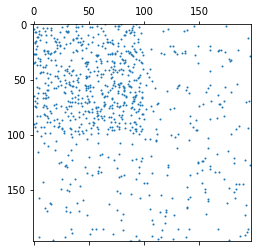

In [213]:
## for loops for sampling indenpendent edge random graph
np.random.seed(12345)
n=100
P=0.1*np.random.random((n,n))
for i in range(n):
    for j in range(n):
        A[i,j]=(np.random.random()>1-P[i,j])*1

plt.spy(A, marker='o', markersize=1)
plt.show()

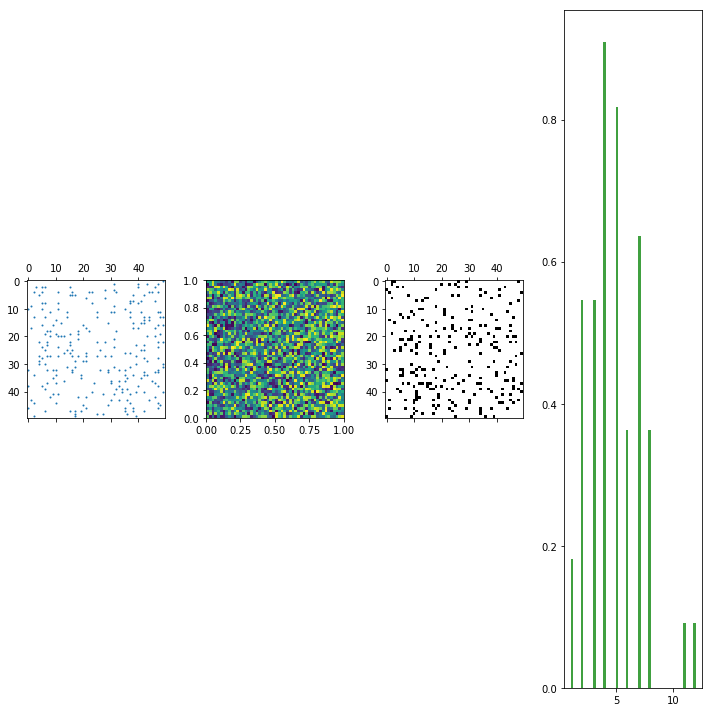

In [75]:
## sort IERG by degree
np.random.seed(12345)
plt.figure(1)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
n=50
P=0.2*np.random.random((n,n))

A=np.random.random((n,n))>1-P
A=A*1
ax1.spy(A, marker='o', markersize=1)
deg=np.sum(A, axis=0)
DEG=np.sum(P, axis=0)
I=np.argsort(DEG)
B=DEG[I]

ax2.imshow(P[np.ix_(I,I)], extent=[0, 1, 0, 1])

ax3.spy(A[np.ix_(I,I)])

ax4.hist(deg, 50, normed=1, facecolor='green', alpha=0.75)

plt.tight_layout()
plt.show()

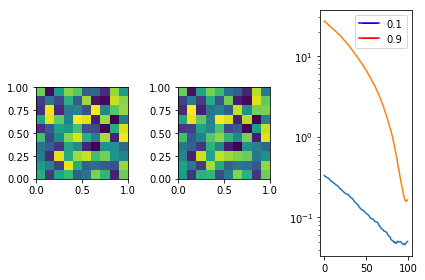

In [74]:
## error as a function of sparsity
# fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

# ax=[ax1, ax2, ax3, ax4, ax5, ax6]
np.random.seed(12345)
plt.figure(1)
n=10
cvec=[0.1, 0.9]

for i in range(2):
    k=cvec[i]
    P=np.random.random((n,n))*k
    m=100
    err=[]
    
    A=np.zeros((n,n,m))
    for j in range(m):
        A[:,:,j]=np.random.random((n,n))>1-P
        A[:,:,j]=A[:,:,j]*1
        Phat=np.sum(A,2)/m
        err.append(np.sum(np.multiply(Phat-P, Phat-P)))
    
    Phat=np.sum(A,2)
    
    ax=plt.subplot(131)
    ax.imshow(P, extent=[0,1,0,1])
    
    ax=plt.subplot(132)
    ax.imshow(Phat, extent=[0,1,0,1])
    
    ax=plt.subplot(133)
    one = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='0.1')
    nine = mlines.Line2D([], [], color='red', marker='_', markersize=15, label='0.9')
    ax.legend(handles=[one, nine])
    ax.semilogy(range(m),err)
#     ax.legend('0.1','0.9')
plt.tight_layout()
plt.show()

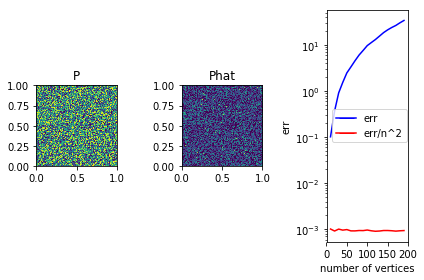

In [215]:
## error as a function of number of vertices
np.random.seed(12345)
c=0.1
m=50
nvec=range(10,200,10)
maxn=max(nvec)
err=[]
P=np.random.random((m,m))
Phat=np.random.random((m,m))
for ns in range(len(nvec)):
    n=nvec[ns]
    P=c*np.random.random((n,n))
    A=np.zeros((n,n,m))
    for i in range(m):
        A[:,:,i]=np.random.random((n,n))>1-P
    A=A*1
    Phat=np.sum(A*1.,2)/m*1.
#     print Phat.shape
    err.append(np.sum(np.multiply(Phat-P*1., Phat-P*1.)))

plt.figure(1)
plt.subplot(131)
plt.imshow(P, extent=[0,1,0,1])
plt.title('P')

plt.subplot(132)
plt.imshow(Phat, extent=[0,1,0,1])
plt.title('Phat')

plt.subplot(133)
plt.semilogy(nvec,err, 'b')
plt.semilogy(nvec, np.divide(err, np.multiply(nvec, nvec)), 'r')
plt.ylabel('err')
plt.xlabel('number of vertices')
errl = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='err')
errnnl = mlines.Line2D([], [], color='red', marker='_', markersize=15, label='err/n^2')
plt.legend(handles=[errl, errnnl], loc="best")
plt.tight_layout()

plt.show()

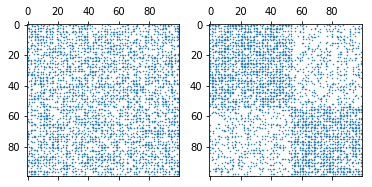

[[ 0.68383743  0.22778828]
 [ 0.24291115  0.49243856]]
0.5
[[ 0.5  0.2]
 [ 0.2  0.5]]


In [58]:
## sample and plot stochastic block model
np.random.seed(12345)
plt.figure(1)

n=100
B=np.array([[0.5, 0.2], [0.2, 0.5]])
pi=0.5
Z=(np.random.random((n,))>pi)*1

A=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A[i,j]=np.random.random()<B[Z[i],Z[j]]
        
A=A*1
I=np.argsort(Z)
# print I
# B=deg[I]

plt.subplot(121)
plt.spy(A, marker='o', markersize=0.5)
plt.subplot(122)
plt.spy(A[np.ix_(I,I)], marker='o', markersize=0.5)
plt.show()
## estimate B & pi

pihat=np.sum(Z)/n

n1=np.sum(Z==1)

Bhat=np.zeros((2,2))
for i in range(2):
    for j in range(2):
        Bhat[i,j]=np.sum(A[np.ix_(Z==i,Z==j)])/n1**2.

print pihat
print Bhat

print pi
print B

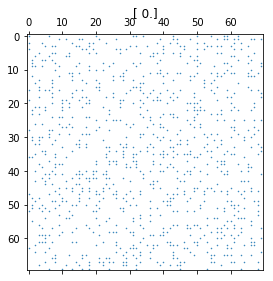

In [85]:
## sample ER graphs and classes jointly
np.random.seed(12345)
m=100
n=70

p0=0.2
p1=0.1

pi=0.5

A=np.zeros((n,n,m))
Y=np.zeros((m,1))
for i in range(m):
    Y[i]=(np.random.random()>pi)*1
    if Y[i]==1:
        A[:,:,i]=(np.random.random((n,n))<p1)*1
    else:
        A[:,:,i]=(np.random.random((n,n))<p0)*1

i=0
i=i+1
plt.spy(A[:,:,i], marker='o', markersize=0.5)
plt.title(str(Y[i]))

plt.tight_layout()
plt.show()

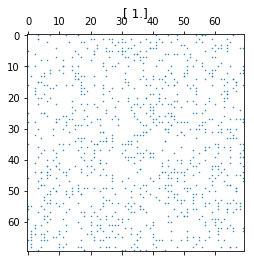

In [89]:
## sample IERG graphs and classes jointly
np.random.seed(12345)
m=100
n=70

p0=np.random.random((n,n))
p1=p0*0.2

pi=0.5

A=np.zeros((n,n,m))
Y=np.zeros((m,1))
for i in range(m):
    Y[i]=(np.random.random>pi)*1
    if Y[i]==1:
        A[:,:,i]=(np.random.random((n,n))<p1)*1 
    else:
        A[:,:,i]=(np.random.random((n,n))<p0)*1

i=0
i=i+1
plt.spy(A[:,:,i], marker='o', markersize=0.5)
plt.title(Y[i])

plt.show()

In [120]:
##
import scipy.sparse.linalg as LA
# import scipy.cluster.vq as vq
import sklearn.cluster as cluster

np.random.seed(12345)

n=100
B=np.array([[0.5, 0.2], [0.2, 0.5]])
pi=0.5
Z=(np.random.random((n,))>pi)*1
A=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A[i,j]=(np.random.random()<B[Z[i],Z[j]])*1

I=np.argsort(Z)
z=Z[I]
A=A[np.ix_(I,I)]

D,V=LA.eigs(A,2)
centroid, idx, intertia=cluster.k_means(V.real,2)
err1=np.sum(np.multiply(idx-z, idx-z))
err2=np.sum(np.square(idx-np.divide(np.ones(n)*2,z)))

err=min(err1,err2)
print err

100


c:\python27\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in divide


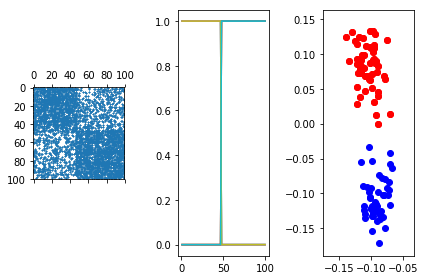

In [135]:
##
plt.figure(1)
plt.subplot(131)
plt.spy(A, marker='o', markersize=0.5)
plt.subplot(132)
plt.plot(range(1,n+1),idx)
plt.plot(range(1,n+1),z)

plt.subplot(133)
plt.scatter(V.real[idx==0,0], V.real[idx==0,1], c='red')
plt.scatter(V.real[idx==1,0], V.real[idx==1,1], c='blue')

plt.tight_layout()
plt.show()

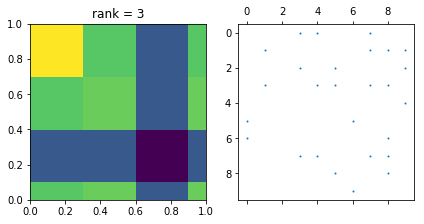

In [192]:
## sample RDPG
np.random.seed(12345)

K=4
D=K
Y=np.random.random((D,K))*0.5
pi=0.5
n=10

X=np.zeros((n,D))
for i in range(n):
    X[i,:]=Y[:,int(np.floor(np.random.random()*K))]

P=np.matmul(X,np.transpose(X))
r=np.linalg.matrix_rank(P)

A=(np.random.random((10,10))<P)*1

plt.figure(2) 
plt.subplot(121)
plt.imshow(P, extent=[0,1,0,1])
plt.title('rank = ' + str(r))

plt.subplot(122)
plt.spy(A, marker='o', markersize=1)

plt.tight_layout()
plt.show()

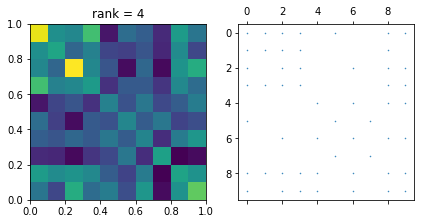

In [197]:
## sample RRDPG
np.random.seed(12345)

K=4
D=K
Y=np.random.random((D,K))*0.5
pi=0.5
n=10

X=np.zeros((n,D))
for i in range(n):
    X[i,:]=Y[:,int(np.floor(np.random.random()*K))]
    X[i,:]=X[i,:]+np.random.randn(1,D)

P=np.matmul(X,np.transpose(X))
r=np.linalg.matrix_rank(P)

A=(np.random.random((10,10))<P)*1

plt.figure(2)
plt.subplot(121)
plt.imshow(P, extent=[0,1,0,1])
plt.title('rank = ' + str(r))
plt.subplot(122)
plt.spy(A, marker='o', markersize=0.5)

plt.tight_layout()
plt.show()